In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample #downsample
from sklearn.model_selection import train_test_split #split data
from sklearn.model_selection import GridSearchCV #cross validation
from sklearn.preprocessing import scale #scale
from sklearn.svm import SVC #SVM
from sklearn.metrics import confusion_matrix #generates confustion matrix
from sklearn.metrics import plot_confusion_matrix #plots confusion matrix
from sklearn.decomposition import PCA #PCA
from sklearn.impute import SimpleImputer #imputer
from google.colab import files
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.utils.fixes import loguniform

import os
import matplotlib.pyplot as plt
import warnings
import itertools
import statsmodels.api as sm
import sklearn
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.utils import check_array
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_iris
from math import sqrt
from sklearn.model_selection import train_test_split
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose 
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from subprocess import check_call
from subprocess import call
from IPython.display import Image
!pip install graphviz


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
### Function: Dropping Data
def datadrop(df,list,column):
  new_list = df.drop(list, axis=column)
  return new_list

## Function: Checking for Nulls or NA
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * mis_val / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

### Function: Identifying columns with only 1 unique value 
def unique_value_col(df):
        # Find the unique # of values in each column
        uni_val = []
        for col in trainingdata_1:
          if len(trainingdata_1[col].unique()) <= 1:
            uni_val.append(col) 
        # Return the dataframe with missing information
        return uni_val

### Function: Label Encoding the variables with 2 or fewer unique categories, as one hot encoding preparation
def onehotprep(df):
  # Create a label encoder object
  le = LabelEncoder()
  le_count = 0
  # Iterate through the columns
  for col in df:
      if df[col].dtype == 'object':
        # If 2 or fewer unique categories
          if len(list(df[col].unique())) <= 2:
            # Train on the training data
              le.fit(df[col])
              # Transform both training
              df[col] = le.transform(df[col])
              # Keep track of how many columns were label encoded
              le_count += 1
                
  return print('%d columns were label encoded.' % le_count)

### Function: drop columns with imbalance class problems
def drop_col_threshold(df,threshold):
    #length for each column
    length = df.shape[0]

    column_names = df.columns.values.tolist()
    column_remove = []

    #create a df for values of the highest frequency and percentage
    for name in column_names:
        for idx,val in enumerate(df[name].value_counts()[:1].index.tolist()):
            perc = df[name].value_counts()[idx] / length
            #print('Name :', val)
            #print('Counts :', df[name].value_counts()[idx])
            #print(perc)
            if perc >= threshold:
                column_remove.append(name)
    
    return(column_remove)

### Function: figure out variables with high categories
def cat_highlevel(df,threshold):

    column_names = df.columns.values.tolist()
    column_other_encode = []

    for col in df.select_dtypes(include='object'):
        if len(list(df[col].unique())) > threshold:
            column_other_encode.append(col)

    return(column_other_encode)

### Function: Confirming type
def conversion(df):
  data_type = pd.read_csv('gdrive/My Drive/Humana/name.csv')
  cate = data_type['categorical'].values.tolist()
  cate = cate[1:96]
  num = data_type["numerical"].values.tolist()


  df_num = df[num]
  df_cate = df[cate]


  df_cate = df_cate.astype(str)

  train = pd.concat([df_cate,df_num],axis=1)    
  return train

# return type specified
def return_type(df,type):

  if type == "num":
    return df.select_dtypes(include='float64')
  elif type == "cate":
    return df.select_dtypes(include = 'object')
  else:
    print("num or cate")

def datadrop(df,list,column):
  new_list = df.drop(list, axis=column)
  return new_list

def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape


In [4]:
# import clean data
df = pd.read_csv('/content/gdrive/MyDrive/Humana/train_post_oversampling_race.csv').copy()
df.head()

,Unnamed: 0,bh_ncdm_ind,rej_med_ip_snf_coins_pmpm_cost_t_9-6-3m_b4,total_ip_maternity_net_paid_pmpm_cost_t_12-9-6m_b4,covid_vaccination,sex_cd,rx_gpi2_72_pmpm_cost_6to9m_b4,atlas_pct_laccess_child15,atlas_recfacpth14,atlas_pct_fmrkt_frveg16,atlas_pct_free_lunch14,bh_ncal_pmpm_ct,cons_chmi,rx_gpi4_6110_pmpm_ct,atlas_pc_snapben15,credit_bal_nonmtgcredit_60dpd,rx_bh_mbr_resp_pmpm_cost_9to12m_b4,atlas_pct_laccess_nhna15,credit_hh_nonmtgcredit_60dpd,rx_bh_pmpm_ct_0to3m_b4,cons_lwcm10,atlas_fsrpth14,atlas_wicspth12,cmsd2_sns_digest_abdomen_pmpm_ct,atlas_ghveg_farms12,credit_hh_bankcardcredit_60dpd,total_outpatient_allowed_pmpm_cost_6to9m_b4,cons_cwht,atlas_netmigrationrate1016,atlas_pct_laccess_snap15,rx_nonmaint_mbr_resp_pmpm_cost_9to12m_b4,atlas_naturalchangerate1016,ccsp_236_pct,atlas_pct_laccess_hisp15,auth_3mth_dc_no_ref,rx_overall_mbr_resp_pmpm_cost,rx_overall_gpi_pmpm_ct_0to3m_b4,atlas_pct_laccess_hhnv15,credit_bal_consumerfinance,rwjf_uninsured_pct,...,cons_hhcomp_G,cons_hhcomp_H,cons_hhcomp_I,cons_hhcomp_J,cons_hhcomp_K,cons_hhcomp_L,race_cd_1.0,race_cd_2.0,race_cd_3.0,race_cd_4.0,race_cd_5.0,race_cd_6.0,race_age_1,race_age_2,race_age_3,race_age_4,race_age_11,race_age_12,race_age_13,race_age_14,race_age_21,race_age_22,race_age_23,race_age_24,race_age_31,race_age_32,race_age_33,race_age_34,race_age_41,race_age_42,race_age_43,race_age_44,race_age_51,race_age_52,race_age_53,race_age_54,race_age_61,race_age_62,race_age_63,race_age_64
0,0,0,0,0,0,1,-0.064944,1.086122,-0.861781,-2.057716,0.021739,-0.058108,0.038289,-0.068574,-1.311756,-0.213839,-0.145163,-0.158248,0.000577,-0.435859,-0.217516,0.699200,1.091206,-0.207467,0.134057,-0.349892,-0.156668,0.846695,2.115089,-0.591710,-0.174512,0.215786,-0.123161,-0.152441,-0.01592,-0.194952,-0.155394,-0.777575,-0.431114,-0.898407,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,-0.064944,-1.202714,0.101038,-0.126105,-0.610068,-0.058108,0.109212,-0.068574,-0.741894,0.303586,-0.145163,-0.167611,-0.329791,-0.435859,-1.180385,0.063614,-0.820376,-0.207467,0.283711,-0.280185,-0.156668,1.174804,2.154126,-0.836778,-0.174512,0.598686,-0.123161,-0.119262,-0.01592,0.013058,0.444256,0.043331,-0.476696,-0.681004,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,1,-0.064944,0.013994,-1.424635,-1.091910,-0.430022,-0.058108,0.357445,-0.068574,-0.498594,1.779204,-0.128534,-0.097205,1.511167,-0.435859,-0.280310,-0.902755,-0.636227,-0.207467,-0.464558,1.102709,5.544069,-0.137632,1.059536,0.065241,-0.174512,0.703517,-0.123161,0.133092,-0.01592,-0.046800,-0.395254,-0.105456,1.999817,0.009150,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,1,-0.032595,-0.343739,-0.424366,-0.448040,2.947826,-0.058108,-0.706410,-0.068574,0.968787,1.290092,-0.145163,0.000468,1.263638,-0.435859,-0.121933,-0.023202,-0.829645,-0.207467,-0.614212,2.883595,-0.156668,0.584208,0.199714,1.638835,-0.174512,0.887140,-0.123161,0.222447,-0.01592,-0.331119,-0.395254,-0.538908,-0.107864,1.062569,...,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,1,-0.064944,-1.614428,-0.331540,0.784087,-0.636526,-0.058108,1.598610,-0.068574,-2.107904,-1.165291,-0.145163,-0.158977,-1.210703,-0.435859,-0.217516,0.195525,0.044130,-0.207467,1.929903,-1.007120,-0.156668,0.452964,1.381152,-1.485668,-0.174512,-0.086805,-0.123161,0.634454,-0.01592,-0.428564,-0.275324,-1.373634,-1.168768,-0.398194,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# drop first column
df = df.iloc[: , 1:]
df.head()
# df['covid_vaccination'].describe()

,bh_ncdm_ind,rej_med_ip_snf_coins_pmpm_cost_t_9-6-3m_b4,total_ip_maternity_net_paid_pmpm_cost_t_12-9-6m_b4,covid_vaccination,sex_cd,rx_gpi2_72_pmpm_cost_6to9m_b4,atlas_pct_laccess_child15,atlas_recfacpth14,atlas_pct_fmrkt_frveg16,atlas_pct_free_lunch14,bh_ncal_pmpm_ct,cons_chmi,rx_gpi4_6110_pmpm_ct,atlas_pc_snapben15,credit_bal_nonmtgcredit_60dpd,rx_bh_mbr_resp_pmpm_cost_9to12m_b4,atlas_pct_laccess_nhna15,credit_hh_nonmtgcredit_60dpd,rx_bh_pmpm_ct_0to3m_b4,cons_lwcm10,atlas_fsrpth14,atlas_wicspth12,cmsd2_sns_digest_abdomen_pmpm_ct,atlas_ghveg_farms12,credit_hh_bankcardcredit_60dpd,total_outpatient_allowed_pmpm_cost_6to9m_b4,cons_cwht,atlas_netmigrationrate1016,atlas_pct_laccess_snap15,rx_nonmaint_mbr_resp_pmpm_cost_9to12m_b4,atlas_naturalchangerate1016,ccsp_236_pct,atlas_pct_laccess_hisp15,auth_3mth_dc_no_ref,rx_overall_mbr_resp_pmpm_cost,rx_overall_gpi_pmpm_ct_0to3m_b4,atlas_pct_laccess_hhnv15,credit_bal_consumerfinance,rwjf_uninsured_pct,rx_mail_mbr_resp_pmpm_cost_0to3m_b4,...,cons_hhcomp_G,cons_hhcomp_H,cons_hhcomp_I,cons_hhcomp_J,cons_hhcomp_K,cons_hhcomp_L,race_cd_1.0,race_cd_2.0,race_cd_3.0,race_cd_4.0,race_cd_5.0,race_cd_6.0,race_age_1,race_age_2,race_age_3,race_age_4,race_age_11,race_age_12,race_age_13,race_age_14,race_age_21,race_age_22,race_age_23,race_age_24,race_age_31,race_age_32,race_age_33,race_age_34,race_age_41,race_age_42,race_age_43,race_age_44,race_age_51,race_age_52,race_age_53,race_age_54,race_age_61,race_age_62,race_age_63,race_age_64
0,0,0,0,0,1,-0.064944,1.086122,-0.861781,-2.057716,0.021739,-0.058108,0.038289,-0.068574,-1.311756,-0.213839,-0.145163,-0.158248,0.000577,-0.435859,-0.217516,0.699200,1.091206,-0.207467,0.134057,-0.349892,-0.156668,0.846695,2.115089,-0.591710,-0.174512,0.215786,-0.123161,-0.152441,-0.01592,-0.194952,-0.155394,-0.777575,-0.431114,-0.898407,-0.287648,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,-0.064944,-1.202714,0.101038,-0.126105,-0.610068,-0.058108,0.109212,-0.068574,-0.741894,0.303586,-0.145163,-0.167611,-0.329791,-0.435859,-1.180385,0.063614,-0.820376,-0.207467,0.283711,-0.280185,-0.156668,1.174804,2.154126,-0.836778,-0.174512,0.598686,-0.123161,-0.119262,-0.01592,0.013058,0.444256,0.043331,-0.476696,-0.681004,0.073970,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,-0.064944,0.013994,-1.424635,-1.091910,-0.430022,-0.058108,0.357445,-0.068574,-0.498594,1.779204,-0.128534,-0.097205,1.511167,-0.435859,-0.280310,-0.902755,-0.636227,-0.207467,-0.464558,1.102709,5.544069,-0.137632,1.059536,0.065241,-0.174512,0.703517,-0.123161,0.133092,-0.01592,-0.046800,-0.395254,-0.105456,1.999817,0.009150,-0.255173,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,-0.032595,-0.343739,-0.424366,-0.448040,2.947826,-0.058108,-0.706410,-0.068574,0.968787,1.290092,-0.145163,0.000468,1.263638,-0.435859,-0.121933,-0.023202,-0.829645,-0.207467,-0.614212,2.883595,-0.156668,0.584208,0.199714,1.638835,-0.174512,0.887140,-0.123161,0.222447,-0.01592,-0.331119,-0.395254,-0.538908,-0.107864,1.062569,-0.100256,...,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,-0.064944,-1.614428,-0.331540,0.784087,-0.636526,-0.058108,1.598610,-0.068574,-2.107904,-1.165291,-0.145163,-0.158977,-1.210703,-0.435859,-0.217516,0.195525,0.044130,-0.207467,1.929903,-1.007120,-0.156668,0.452964,1.381152,-1.485668,-0.174512,-0.086805,-0.123161,0.634454,-0.01592,-0.428564,-0.275324,-1.373634,-1.168768,-0.398194,-0.321002,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# Imputation using mean
colname = df.columns.tolist()
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df = imp.fit_transform(df)
df = pd.DataFrame(df, index = None, columns = colname)
df.head()

,bh_ncdm_ind,rej_med_ip_snf_coins_pmpm_cost_t_9-6-3m_b4,total_ip_maternity_net_paid_pmpm_cost_t_12-9-6m_b4,covid_vaccination,sex_cd,rx_gpi2_72_pmpm_cost_6to9m_b4,atlas_pct_laccess_child15,atlas_recfacpth14,atlas_pct_fmrkt_frveg16,atlas_pct_free_lunch14,bh_ncal_pmpm_ct,cons_chmi,rx_gpi4_6110_pmpm_ct,atlas_pc_snapben15,credit_bal_nonmtgcredit_60dpd,rx_bh_mbr_resp_pmpm_cost_9to12m_b4,atlas_pct_laccess_nhna15,credit_hh_nonmtgcredit_60dpd,rx_bh_pmpm_ct_0to3m_b4,cons_lwcm10,atlas_fsrpth14,atlas_wicspth12,cmsd2_sns_digest_abdomen_pmpm_ct,atlas_ghveg_farms12,credit_hh_bankcardcredit_60dpd,total_outpatient_allowed_pmpm_cost_6to9m_b4,cons_cwht,atlas_netmigrationrate1016,atlas_pct_laccess_snap15,rx_nonmaint_mbr_resp_pmpm_cost_9to12m_b4,atlas_naturalchangerate1016,ccsp_236_pct,atlas_pct_laccess_hisp15,auth_3mth_dc_no_ref,rx_overall_mbr_resp_pmpm_cost,rx_overall_gpi_pmpm_ct_0to3m_b4,atlas_pct_laccess_hhnv15,credit_bal_consumerfinance,rwjf_uninsured_pct,rx_mail_mbr_resp_pmpm_cost_0to3m_b4,...,cons_hhcomp_G,cons_hhcomp_H,cons_hhcomp_I,cons_hhcomp_J,cons_hhcomp_K,cons_hhcomp_L,race_cd_1.0,race_cd_2.0,race_cd_3.0,race_cd_4.0,race_cd_5.0,race_cd_6.0,race_age_1,race_age_2,race_age_3,race_age_4,race_age_11,race_age_12,race_age_13,race_age_14,race_age_21,race_age_22,race_age_23,race_age_24,race_age_31,race_age_32,race_age_33,race_age_34,race_age_41,race_age_42,race_age_43,race_age_44,race_age_51,race_age_52,race_age_53,race_age_54,race_age_61,race_age_62,race_age_63,race_age_64
0,0.0,0.0,0.0,0.0,1.0,-0.064944,1.086122,-0.861781,-2.057716,0.021739,-0.058108,0.038289,-0.068574,-1.311756,-0.213839,-0.145163,-0.158248,0.000577,-0.435859,-0.217516,0.699200,1.091206,-0.207467,0.134057,-0.349892,-0.156668,0.846695,2.115089,-0.591710,-0.174512,0.215786,-0.123161,-0.152441,-0.01592,-0.194952,-0.155394,-0.777575,-0.431114,-0.898407,-0.287648,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,-0.064944,-1.202714,0.101038,-0.126105,-0.610068,-0.058108,0.109212,-0.068574,-0.741894,0.303586,-0.145163,-0.167611,-0.329791,-0.435859,-1.180385,0.063614,-0.820376,-0.207467,0.283711,-0.280185,-0.156668,1.174804,2.154126,-0.836778,-0.174512,0.598686,-0.123161,-0.119262,-0.01592,0.013058,0.444256,0.043331,-0.476696,-0.681004,0.073970,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,-0.064944,0.013994,-1.424635,-1.091910,-0.430022,-0.058108,0.357445,-0.068574,-0.498594,1.779204,-0.128534,-0.097205,1.511167,-0.435859,-0.280310,-0.902755,-0.636227,-0.207467,-0.464558,1.102709,5.544069,-0.137632,1.059536,0.065241,-0.174512,0.703517,-0.123161,0.133092,-0.01592,-0.046800,-0.395254,-0.105456,1.999817,0.009150,-0.255173,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,-0.032595,-0.343739,-0.424366,-0.448040,2.947826,-0.058108,-0.706410,-0.068574,0.968787,1.290092,-0.145163,0.000468,1.263638,-0.435859,-0.121933,-0.023202,-0.829645,-0.207467,-0.614212,2.883595,-0.156668,0.584208,0.199714,1.638835,-0.174512,0.887140,-0.123161,0.222447,-0.01592,-0.331119,-0.395254,-0.538908,-0.107864,1.062569,-0.100256,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,-0.064944,-1.614428,-0.331540,0.784087,-0.636526,-0.058108,1.598610,-0.068574,-2.107904,-1.165291,-0.145163,-0.158977,-1.210703,-0.435859,-0.217516,0.195525,0.044130,-0.207467,1.929903,-1.007120,-0.156668,0.452964,1.381152,-1.485668,-0.174512,-0.086805,-0.123161,0.634454,-0.01592,-0.428564,-0.275324,-1.373634,-1.168768,-0.398194,-0.321002,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [7]:
# split into covid vac & novac
df_vac = df[df['covid_vaccination'] == 0]
df_novac = df[df['covid_vaccination'] == 1]

In [8]:
# downsample novac
df_novac_downsample = resample(df_novac, replace = False, n_samples = 5000, random_state = 284)
len(df_novac_downsample)

5000

In [9]:
# downsample vac
df_vac_downsample = resample(df_vac, replace = False, n_samples = 5000, random_state = 284)
len(df_vac_downsample)

5000

In [10]:
# concat
df_downsample = pd.concat([df_novac_downsample, df_vac_downsample])
len(df_downsample)
df_downsample

,bh_ncdm_ind,rej_med_ip_snf_coins_pmpm_cost_t_9-6-3m_b4,total_ip_maternity_net_paid_pmpm_cost_t_12-9-6m_b4,covid_vaccination,sex_cd,rx_gpi2_72_pmpm_cost_6to9m_b4,atlas_pct_laccess_child15,atlas_recfacpth14,atlas_pct_fmrkt_frveg16,atlas_pct_free_lunch14,bh_ncal_pmpm_ct,cons_chmi,rx_gpi4_6110_pmpm_ct,atlas_pc_snapben15,credit_bal_nonmtgcredit_60dpd,rx_bh_mbr_resp_pmpm_cost_9to12m_b4,atlas_pct_laccess_nhna15,credit_hh_nonmtgcredit_60dpd,rx_bh_pmpm_ct_0to3m_b4,cons_lwcm10,atlas_fsrpth14,atlas_wicspth12,cmsd2_sns_digest_abdomen_pmpm_ct,atlas_ghveg_farms12,credit_hh_bankcardcredit_60dpd,total_outpatient_allowed_pmpm_cost_6to9m_b4,cons_cwht,atlas_netmigrationrate1016,atlas_pct_laccess_snap15,rx_nonmaint_mbr_resp_pmpm_cost_9to12m_b4,atlas_naturalchangerate1016,ccsp_236_pct,atlas_pct_laccess_hisp15,auth_3mth_dc_no_ref,rx_overall_mbr_resp_pmpm_cost,rx_overall_gpi_pmpm_ct_0to3m_b4,atlas_pct_laccess_hhnv15,credit_bal_consumerfinance,rwjf_uninsured_pct,rx_mail_mbr_resp_pmpm_cost_0to3m_b4,...,cons_hhcomp_G,cons_hhcomp_H,cons_hhcomp_I,cons_hhcomp_J,cons_hhcomp_K,cons_hhcomp_L,race_cd_1.0,race_cd_2.0,race_cd_3.0,race_cd_4.0,race_cd_5.0,race_cd_6.0,race_age_1,race_age_2,race_age_3,race_age_4,race_age_11,race_age_12,race_age_13,race_age_14,race_age_21,race_age_22,race_age_23,race_age_24,race_age_31,race_age_32,race_age_33,race_age_34,race_age_41,race_age_42,race_age_43,race_age_44,race_age_51,race_age_52,race_age_53,race_age_54,race_age_61,race_age_62,race_age_63,race_age_64
551687,0.0,0.0,1.0,1.0,1.0,-0.064944,1.426766,0.464053,0.747720,-0.443825,-0.058108,-0.062763,-0.068574,-1.566270,0.100822,-0.145163,-0.105602,-0.623315,-0.435859,0.002976,0.301467,-0.794042,-0.207467,0.134057,-0.543145,-0.156668,-0.049859,-0.741226,-0.857998,-0.174512,0.161900,-0.123161,0.612328,-0.01592,1.866721,1.883416,-0.053639,-0.400930,-0.428385,-0.092357,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
665158,0.0,0.0,0.0,1.0,0.0,-0.064944,-1.647884,0.526775,1.161637,0.628054,-0.058108,4.683790,-0.068574,-1.562465,-0.558300,-0.145163,-0.045490,-1.017704,-0.435859,-1.338917,0.694489,-0.828836,-0.207467,-0.464558,-0.563271,-0.156668,2.749728,1.167939,-0.654350,-0.174512,0.195582,-0.123161,-0.008823,-0.01592,-0.377763,-0.635114,-1.202939,-0.204613,0.551841,-0.215676,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
781017,0.0,0.0,0.0,1.0,0.0,0.122778,1.505574,0.003818,1.054325,0.784245,-0.058108,-0.280868,-0.068574,0.076323,-0.832305,1.590128,-0.092518,-0.580120,0.041716,2.396406,-0.534121,-0.077359,-0.207467,-0.464558,-0.434225,-0.156668,0.059233,-0.349715,0.946271,0.798900,-1.087785,-0.123161,-0.719412,-0.01592,0.048068,1.283766,-0.846587,-0.270518,-1.399532,-0.321002,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
552132,0.0,0.0,0.0,1.0,0.0,-0.064944,-0.231754,-0.394277,-2.057716,-0.834722,-0.058108,-0.990105,-0.068574,0.265422,-0.051491,-0.145163,-0.045204,-0.278416,-0.435859,0.287002,0.364095,-0.944923,-0.207467,1.031980,-0.065774,-0.060518,1.043561,-0.224403,-0.450198,-0.132494,0.606529,-0.123161,-0.239617,-0.01592,-0.228405,-0.515184,-1.009837,-0.951742,0.664655,-0.105962,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
479763,0.0,0.0,0.0,1.0,1.0,-0.064944,0.549165,1.218085,0.517766,-0.487825,-0.058108,-0.351792,-0.068574,-0.379014,0.273918,-0.145163,-0.016224,-0.209534,-0.435859,-0.688936,-0.386142,1.313040,-0.207467,2.977480,1.279411,-0.156668,-0.072011,-1.365460,0.173371,-0.006439,0.690062,-0.123161,-0.576661,-0.01592,-0.244147,-0.035464,-0.754182,-0.849139,-1.176930,-0.024334,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,

In [11]:
X = df_downsample.drop('covid_vaccination', axis = 1).copy()
X.head()

,bh_ncdm_ind,rej_med_ip_snf_coins_pmpm_cost_t_9-6-3m_b4,total_ip_maternity_net_paid_pmpm_cost_t_12-9-6m_b4,sex_cd,rx_gpi2_72_pmpm_cost_6to9m_b4,atlas_pct_laccess_child15,atlas_recfacpth14,atlas_pct_fmrkt_frveg16,atlas_pct_free_lunch14,bh_ncal_pmpm_ct,cons_chmi,rx_gpi4_6110_pmpm_ct,atlas_pc_snapben15,credit_bal_nonmtgcredit_60dpd,rx_bh_mbr_resp_pmpm_cost_9to12m_b4,atlas_pct_laccess_nhna15,credit_hh_nonmtgcredit_60dpd,rx_bh_pmpm_ct_0to3m_b4,cons_lwcm10,atlas_fsrpth14,atlas_wicspth12,cmsd2_sns_digest_abdomen_pmpm_ct,atlas_ghveg_farms12,credit_hh_bankcardcredit_60dpd,total_outpatient_allowed_pmpm_cost_6to9m_b4,cons_cwht,atlas_netmigrationrate1016,atlas_pct_laccess_snap15,rx_nonmaint_mbr_resp_pmpm_cost_9to12m_b4,atlas_naturalchangerate1016,ccsp_236_pct,atlas_pct_laccess_hisp15,auth_3mth_dc_no_ref,rx_overall_mbr_resp_pmpm_cost,rx_overall_gpi_pmpm_ct_0to3m_b4,atlas_pct_laccess_hhnv15,credit_bal_consumerfinance,rwjf_uninsured_pct,rx_mail_mbr_resp_pmpm_cost_0to3m_b4,atlas_pct_wic15,...,cons_hhcomp_G,cons_hhcomp_H,cons_hhcomp_I,cons_hhcomp_J,cons_hhcomp_K,cons_hhcomp_L,race_cd_1.0,race_cd_2.0,race_cd_3.0,race_cd_4.0,race_cd_5.0,race_cd_6.0,race_age_1,race_age_2,race_age_3,race_age_4,race_age_11,race_age_12,race_age_13,race_age_14,race_age_21,race_age_22,race_age_23,race_age_24,race_age_31,race_age_32,race_age_33,race_age_34,race_age_41,race_age_42,race_age_43,race_age_44,race_age_51,race_age_52,race_age_53,race_age_54,race_age_61,race_age_62,race_age_63,race_age_64
551687,0.0,0.0,1.0,1.0,-0.064944,1.426766,0.464053,0.747720,-0.443825,-0.058108,-0.062763,-0.068574,-1.566270,0.100822,-0.145163,-0.105602,-0.623315,-0.435859,0.002976,0.301467,-0.794042,-0.207467,0.134057,-0.543145,-0.156668,-0.049859,-0.741226,-0.857998,-0.174512,0.161900,-0.123161,0.612328,-0.01592,1.866721,1.883416,-0.053639,-0.400930,-0.428385,-0.092357,-1.400804,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
665158,0.0,0.0,0.0,0.0,-0.064944,-1.647884,0.526775,1.161637,0.628054,-0.058108,4.683790,-0.068574,-1.562465,-0.558300,-0.145163,-0.045490,-1.017704,-0.435859,-1.338917,0.694489,-0.828836,-0.207467,-0.464558,-0.563271,-0.156668,2.749728,1.167939,-0.654350,-0.174512,0.195582,-0.123161,-0.008823,-0.01592,-0.377763,-0.635114,-1.202939,-0.204613,0.551841,-0.215676,0.984478,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
781017,0.0,0.0,0.0,0.0,0.122778,1.505574,0.003818,1.054325,0.784245,-0.058108,-0.280868,-0.068574,0.076323,-0.832305,1.590128,-0.092518,-0.580120,0.041716,2.396406,-0.534121,-0.077359,-0.207467,-0.464558,-0.434225,-0.156668,0.059233,-0.349715,0.946271,0.798900,-1.087785,-0.123161,-0.719412,-0.01592,0.048068,1.283766,-0.846587,-0.270518,-1.399532,-0.321002,0.179934,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
552132,0.0,0.0,0.0,0.0,-0.064944,-0.231754,-0.394277,-2.057716,-0.834722,-0.058108,-0.990105,-0.068574,0.265422,-0.051491,-0.145163,-0.045204,-0.278416,-0.435859,0.287002,0.364095,-0.944923,-0.207467,1.031980,-0.065774,-0.060518,1.043561,-0.224403,-0.450198,-0.132494,0.606529,-0.123161,-0.239617,-0.01592,-0.228405,-0.515184,-1.009837,-0.951742,0.664655,-0.105962,-1.345058,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
479763,0.0,0.0,0.0,1.0,-0.064944,0.549165,1.218085,0.517766,-0.487825,-0.058108,-0.351792,-0.068574,-0.379014,0.273918,-0.145163,-0.016224,-0.209534,-0.435859,-0.688936,-0.386142,1.313040,-0.207467,2.977480,1.279411,-0.156668,-0.072011,-1.365460,0.173371,-0.006439,0.690062,-0.123161,-0.576661,-0.01592,-0.244147,-0.035464,-0.754182,-0.849139,-1.176930,-0.024334,2.002787,...,0.0

In [12]:
Y = df_downsample['covid_vaccination'].copy()
Y.head()

551687    1.0
665158    1.0
781017    1.0
552132    1.0
479763    1.0
Name: covid_vaccination, dtype: float64

In [13]:
# Training set split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 284)

In [14]:
X_train.head()

,bh_ncdm_ind,rej_med_ip_snf_coins_pmpm_cost_t_9-6-3m_b4,total_ip_maternity_net_paid_pmpm_cost_t_12-9-6m_b4,sex_cd,rx_gpi2_72_pmpm_cost_6to9m_b4,atlas_pct_laccess_child15,atlas_recfacpth14,atlas_pct_fmrkt_frveg16,atlas_pct_free_lunch14,bh_ncal_pmpm_ct,cons_chmi,rx_gpi4_6110_pmpm_ct,atlas_pc_snapben15,credit_bal_nonmtgcredit_60dpd,rx_bh_mbr_resp_pmpm_cost_9to12m_b4,atlas_pct_laccess_nhna15,credit_hh_nonmtgcredit_60dpd,rx_bh_pmpm_ct_0to3m_b4,cons_lwcm10,atlas_fsrpth14,atlas_wicspth12,cmsd2_sns_digest_abdomen_pmpm_ct,atlas_ghveg_farms12,credit_hh_bankcardcredit_60dpd,total_outpatient_allowed_pmpm_cost_6to9m_b4,cons_cwht,atlas_netmigrationrate1016,atlas_pct_laccess_snap15,rx_nonmaint_mbr_resp_pmpm_cost_9to12m_b4,atlas_naturalchangerate1016,ccsp_236_pct,atlas_pct_laccess_hisp15,auth_3mth_dc_no_ref,rx_overall_mbr_resp_pmpm_cost,rx_overall_gpi_pmpm_ct_0to3m_b4,atlas_pct_laccess_hhnv15,credit_bal_consumerfinance,rwjf_uninsured_pct,rx_mail_mbr_resp_pmpm_cost_0to3m_b4,atlas_pct_wic15,...,cons_hhcomp_G,cons_hhcomp_H,cons_hhcomp_I,cons_hhcomp_J,cons_hhcomp_K,cons_hhcomp_L,race_cd_1.0,race_cd_2.0,race_cd_3.0,race_cd_4.0,race_cd_5.0,race_cd_6.0,race_age_1,race_age_2,race_age_3,race_age_4,race_age_11,race_age_12,race_age_13,race_age_14,race_age_21,race_age_22,race_age_23,race_age_24,race_age_31,race_age_32,race_age_33,race_age_34,race_age_41,race_age_42,race_age_43,race_age_44,race_age_51,race_age_52,race_age_53,race_age_54,race_age_61,race_age_62,race_age_63,race_age_64
121100,0.0,0.0,0.0,1.0,-0.064944,0.648284,-1.017404,0.517766,1.115149,-0.058108,-0.387253,-0.068574,1.211024,0.635073,-0.145163,0.115596,1.579860,-0.435859,-1.117204,-1.311911,-1.114376,-0.207467,-0.614212,1.581244,-0.106712,-0.728229,-2.627624,1.552370,-0.174512,1.404721,-0.123161,0.391471,-0.01592,0.124904,-0.275324,1.783628,1.376216,-0.148732,0.060804,-0.124341,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638221,0.0,0.0,0.0,1.0,-0.064944,0.305379,-0.431588,0.088519,-0.294773,-0.058108,0.818449,-0.068574,0.092123,-0.080506,-0.145163,-0.201995,-0.250692,-0.435859,0.055391,0.161859,0.077356,-0.207467,-0.614212,-1.009828,-0.129208,-0.334498,-0.596374,1.564984,0.276154,-0.885954,-0.123161,-0.296094,-0.01592,-0.282801,0.444256,0.533129,-0.187157,-2.070981,-0.237092,-0.689860,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
435772,0.0,0.0,0.0,1.0,-0.064944,0.543574,-0.430567,-1.252878,-1.237008,-0.058108,-0.245406,-0.068574,-1.278682,0.980235,-0.145163,-0.060482,1.093551,-0.435859,-0.325086,-0.283170,-0.781523,-0.207467,-0.614212,-0.205157,-0.156668,0.452964,2.469213,1.670983,-0.174512,0.836966,-0.123161,0.557503,-0.01592,-0.428564,-0.874974,-0.512326,1.027611,1.106817,-0.321002,1.991640,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246565,0.0,0.0,0.0,0.0,-0.064944,0.204486,-0.034534,-0.356991,-0.885767,-0.058108,2.024152,-0.068574,-0.553244,-1.462159,-0.145163,-0.084438,-1.498602,-0.435859,-0.670531,0.960207,-0.597992,-0.207467,0.732673,-2.076402,-0.156668,0.190477,1.281614,-1.433450,-0.174512,0.954129,-0.123161,-0.019937,-0.01592,2.829879,-0.395254,-0.770963,-0.408510,-0.835839,2.399124,0.153727,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1162215,0.0,0.0,1.0,0.0,-0.064944,0.157746,0.692376,0.151930,-0.633095,-0.058108,-0.062763,-0.068574,2.350928,-0.665444,-0.145163,0.000510,-1.059015,-0.435859,0.002976,-0.823594,-0.490263,-0.207467,1.031980,-0.371914,-0.156668,-0.049859,-0.523717,1.866384,-0.174512,2.259266,-0.123161,0.120852,-0.01592,-0.308923,0.804046,-0.402906,-0.657060,-0.819206,-0.321002,-0.687479,...,0.0,0.0

In [15]:
Y_train.head()

121100     1.0
638221     1.0
435772     0.0
246565     1.0
1162215    1.0
Name: covid_vaccination, dtype: float64

In [16]:
# Prelimary Support Vector Classifier_Support Vector Machine
clf_svm = SVC(random_state = 284)
clf_svm.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=284, shrinking=True, tol=0.001,
    verbose=False)

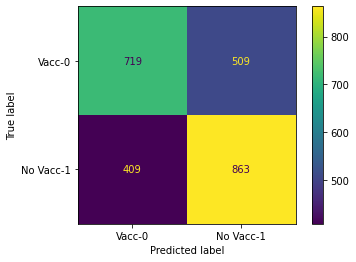

In [17]:
plot_confusion_matrix(clf_svm, X_test, Y_test, values_format = 'd', display_labels = ["Vacc-0", "No Vacc-1"])

In [18]:
  clf_svm_pred = clf_svm.predict(X_test)
  fpr, tpr, thresholds = metrics.roc_curve(Y_test, clf_svm_pred)
  print('AUC:',metrics.auc(fpr,tpr))

AUC: 0.6319820027451702


In [19]:
# Random Grid Search
param_grid_svm =  { 'C': loguniform(1e0, 1e3),
                    'gamma': loguniform(1e-4, 1e-3),
                    'kernel': ['rbf'],
                    'class_weight':['balanced', None]}

random_search_svm = RandomizedSearchCV(estimator = SVC(), 
                       param_distributions = param_grid_svm,
                       n_iter = 10, random_state = 5, cv = 5, n_jobs = -1, verbose = 2)

In [20]:
# K-fold cross validation

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
random_search_svm.fit(x_train, y_train)
random_search_svm.best_params_
best_grid_svm = random_search_svm.best_estimator_
svm_pred = best_grid_svm.predict(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_pred)
print('AUC:',metrics.auc(fpr,tpr))
torch.save(random_search_svm, 'gdrive/My Drive/Humana/model/svmmodel_kevin.pt')
random_search_svm = torch.load('gdrive/My Drive/Humana/model/svmmodel_kevin.pt')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  8.8min finished


AUC: 0.6191831623753821


In [4]:
random_search_svm = torch.load('gdrive/My Drive/Humana/model/svmmodel_kevin.pt')

In [5]:
# Load Holdout file

test = pd.read_csv('/content/gdrive/MyDrive/Humana/test_clean_oversampling_race.csv').copy()
test.head()

,Unnamed: 0,total_physician_office_visit_ct_pmpm_t_6-3-0m_b4_Resolved,credit_bal_nonmtgcredit_60dpd,med_outpatient_mbr_resp_pmpm_cost_t_9-6-3m_b4_Dec,rx_maint_net_paid_pmpm_cost_t_9-6-3m_b4_No_Change,total_outpatient_allowed_pmpm_cost_6to9m_b4,med_outpatient_visit_ct_pmpm_t_12-9-6m_b4_No_Change,auth_3mth_acute_mean_los,atlas_perpov_1980_0711_0.0,atlas_orchard_farms12,cons_rxadhm_3.0,rx_maint_pmpm_cost_t_12-9-6m_b4_No Activity,atlas_pct_laccess_white15,rx_mail_mbr_resp_pmpm_cost_t_9-6-3m_b4_Resolved,rx_gpi2_72_pmpm_cost_6to9m_b4,sex_cd,rx_phar_cat_cvs_pmpm_ct_t_9-6-3m_b4_Dec,med_physician_office_allowed_pmpm_cost_t_9-6-3m_b4_Resolved,rx_mail_mbr_resp_pmpm_cost_0to3m_b4,atlas_type_2015_mining_no_1.0,atlas_pct_laccess_nhasian15,rx_maint_pmpm_cost_t_12-9-6m_b4_Inc,cons_chmi,rx_nonotc_pmpm_cost_t_6-3-0m_b4_Inc,cons_ltmedicr,med_outpatient_visit_ct_pmpm_t_12-9-6m_b4_Dec,rx_gpi2_62_pmpm_cost_t_9-6-3m_b4_New,cms_partd_ra_factor_amt,atlas_retirement_destination_2015_upda_0.0,med_ambulance_coins_pmpm_cost_t_9-6-3m_b4_Inc,rx_days_since_last_script,med_outpatient_mbr_resp_pmpm_cost_t_9-6-3m_b4_Resolved,rx_nonmaint_dist_gpi6_pmpm_ct_t_12-9-6m_b4_Dec,atlas_ownhomepct,credit_num_agencyfirstmtg,atlas_avghhsize,atlas_pct_sfsp15,rx_nonbh_pmpm_cost_t_9-6-3m_b4_Inc,race_age_51,rej_med_ip_snf_coins_pmpm_cost_t_9-6-3m_b4,...,rx_overall_dist_gpi6_pmpm_ct_t_6-3-0m_b4_Dec,atlas_ghveg_sqftpth12,rx_overall_mbr_resp_pmpm_cost_t_6-3-0m_b4_Dec,rx_overall_mbr_resp_pmpm_cost_t_6-3-0m_b4_No_Change,rx_gpi2_39_pmpm_cost_t_6-3-0m_b4_Dec,atlas_pct_fmrkt_wic16,cons_rxadhm_2.0,total_physician_office_visit_ct_pmpm_t_6-3-0m_b4_No Activity,cons_cwht,mcc_chf_pmpm_ct_t_9-6-3m_b4_No_Change,rx_maint_pmpm_ct_9to12m_b4,rx_overall_gpi_pmpm_ct_t_12-9-6m_b4_No Activity,atlas_pc_wic_redemp12,race_age_34,rx_overall_dist_gpi6_pmpm_ct_t_6-3-0m_b4_No_Change,total_bh_copay_pmpm_cost_t_9-6-3m_b4_Inc,rx_overall_gpi_pmpm_ct_0to3m_b4,hum_region_FLORIDA,total_physician_office_copay_pmpm_cost,rx_gpi2_17_pmpm_cost_t_12-9-6m_b4_New,rx_generic_mbr_resp_pmpm_cost,race_age_11,rx_nonotc_dist_gpi6_pmpm_ct,atlas_pct_laccess_nhpi15,total_bh_copay_pmpm_cost_t_9-6-3m_b4_New,race_age_41,rx_nonmaint_dist_gpi6_pmpm_ct_t_12-9-6m_b4_Inc,atlas_pct_fmrkt_otherfood16,atlas_farm_to_school13_0.0,rx_gpi2_49_pmpm_cost_0to3m_b4,phy_em_px_pct,rx_generic_pmpm_cost_t_6-3-0m_b4_Dec,credit_bal_autofinance_new,race_age_54,rx_generic_dist_gpi6_pmpm_ct_t_9-6-3m_b4_New,atlas_pct_reduced_lunch14,med_outpatient_deduct_pmpm_cost_t_9-6-3m_b4_Inc,bh_ncdm_ind,cons_hhcomp_I,total_allowed_pmpm_cost_t_9-6-3m_b4_New
0,0,0,-0.946812,0,0,-0.128344,0,-0.0892,1,-0.136269,0,0,-0.292922,0,-0.06512,0,0,0,-0.321938,0,-0.223922,0,NaN,1,NaN,0,0,4.959303,0,0,-0.525401,0,0,-0.083424,-0.471715,-0.774603,-0.193079,1,0,0,...,0,-0.358220,0,0,0,-0.534387,0,0,NaN,0,1.921249,0,-0.607826,0,0,0,3.680120,0,-0.449863,0,-0.599654,0,0.718491,-0.053935,0,0,1,1.259080,1,-0.024360,1.926401,0,-1.276617,0,0,NaN,0,0,0,0
1,1,0,-0.431530,0,0,-0.156300,0,-0.0892,1,-0.099333,0,1,2.370284,0,-0.06512,0,0,0,-0.321938,0,0.846035,0,NaN,0,NaN,0,0,-0.617254,1,0,-0.525401,0,0,-1.760087,0.406833,0.067388,0.467788,0,0,0,...,0,NaN,0,0,0,2.400749,0,1,NaN,0,-0.776364,1,-0.636659,0,0,0,-0.753501,0,-0.449863,0,-0.622506,0,-0.924499,0.425265,0,0,0,-0.973159,0,-0.134225,-0.770688,0,-1.472250,0,0,0.713408,0,0,0,0
2,2,0,-0.730958,0,0,-0.156300,0,-0.0892,1,-0.162652,0,0,2.588124,0,-0.06512,0,0,0,-0.151506,0,0.154404,1,-0.601115,1,0.986565,0,0,-0.182241,1,0,-0.538474,0,0,-0.026915,0.191313,-1.055266,-0.951396,0,0,0,...,0,0.010448,1,0,0,-0.534387,1,0,-0.335777,0,-0.596523,0,-1.109005,0,0,0,0.324947,0,0.912242,0,-0.452766,0,-0.292580,0.256493,0,0,0,0.068552,0,0.011750,-0.267231,0,-0.322192,0,0,-0.866091,0,0,0,1
3,3,0,-0.324740,0,0,-0.156300,0,-0.0892,1,-0.199589,0,0,-1.299572,0,-0.06512,0,0,0,-0.215695,0,-0.669522,0,-1.241296,0,0.986565,0,0,-0.488846,1,0,-0.512329,0,1,1.147600,-1.346531,-0.662337,-0.970716,0,0,0,...,1,-0.358220,1,0,0,NaN,0,1,-1.124970,0,-0.057001,0,0.676283,0,0,0,-0.5138

In [6]:
# drop first column
test = test.iloc[: , 1:]
test.head()

,total_physician_office_visit_ct_pmpm_t_6-3-0m_b4_Resolved,credit_bal_nonmtgcredit_60dpd,med_outpatient_mbr_resp_pmpm_cost_t_9-6-3m_b4_Dec,rx_maint_net_paid_pmpm_cost_t_9-6-3m_b4_No_Change,total_outpatient_allowed_pmpm_cost_6to9m_b4,med_outpatient_visit_ct_pmpm_t_12-9-6m_b4_No_Change,auth_3mth_acute_mean_los,atlas_perpov_1980_0711_0.0,atlas_orchard_farms12,cons_rxadhm_3.0,rx_maint_pmpm_cost_t_12-9-6m_b4_No Activity,atlas_pct_laccess_white15,rx_mail_mbr_resp_pmpm_cost_t_9-6-3m_b4_Resolved,rx_gpi2_72_pmpm_cost_6to9m_b4,sex_cd,rx_phar_cat_cvs_pmpm_ct_t_9-6-3m_b4_Dec,med_physician_office_allowed_pmpm_cost_t_9-6-3m_b4_Resolved,rx_mail_mbr_resp_pmpm_cost_0to3m_b4,atlas_type_2015_mining_no_1.0,atlas_pct_laccess_nhasian15,rx_maint_pmpm_cost_t_12-9-6m_b4_Inc,cons_chmi,rx_nonotc_pmpm_cost_t_6-3-0m_b4_Inc,cons_ltmedicr,med_outpatient_visit_ct_pmpm_t_12-9-6m_b4_Dec,rx_gpi2_62_pmpm_cost_t_9-6-3m_b4_New,cms_partd_ra_factor_amt,atlas_retirement_destination_2015_upda_0.0,med_ambulance_coins_pmpm_cost_t_9-6-3m_b4_Inc,rx_days_since_last_script,med_outpatient_mbr_resp_pmpm_cost_t_9-6-3m_b4_Resolved,rx_nonmaint_dist_gpi6_pmpm_ct_t_12-9-6m_b4_Dec,atlas_ownhomepct,credit_num_agencyfirstmtg,atlas_avghhsize,atlas_pct_sfsp15,rx_nonbh_pmpm_cost_t_9-6-3m_b4_Inc,race_age_51,rej_med_ip_snf_coins_pmpm_cost_t_9-6-3m_b4,ccsp_193_pct,...,rx_overall_dist_gpi6_pmpm_ct_t_6-3-0m_b4_Dec,atlas_ghveg_sqftpth12,rx_overall_mbr_resp_pmpm_cost_t_6-3-0m_b4_Dec,rx_overall_mbr_resp_pmpm_cost_t_6-3-0m_b4_No_Change,rx_gpi2_39_pmpm_cost_t_6-3-0m_b4_Dec,atlas_pct_fmrkt_wic16,cons_rxadhm_2.0,total_physician_office_visit_ct_pmpm_t_6-3-0m_b4_No Activity,cons_cwht,mcc_chf_pmpm_ct_t_9-6-3m_b4_No_Change,rx_maint_pmpm_ct_9to12m_b4,rx_overall_gpi_pmpm_ct_t_12-9-6m_b4_No Activity,atlas_pc_wic_redemp12,race_age_34,rx_overall_dist_gpi6_pmpm_ct_t_6-3-0m_b4_No_Change,total_bh_copay_pmpm_cost_t_9-6-3m_b4_Inc,rx_overall_gpi_pmpm_ct_0to3m_b4,hum_region_FLORIDA,total_physician_office_copay_pmpm_cost,rx_gpi2_17_pmpm_cost_t_12-9-6m_b4_New,rx_generic_mbr_resp_pmpm_cost,race_age_11,rx_nonotc_dist_gpi6_pmpm_ct,atlas_pct_laccess_nhpi15,total_bh_copay_pmpm_cost_t_9-6-3m_b4_New,race_age_41,rx_nonmaint_dist_gpi6_pmpm_ct_t_12-9-6m_b4_Inc,atlas_pct_fmrkt_otherfood16,atlas_farm_to_school13_0.0,rx_gpi2_49_pmpm_cost_0to3m_b4,phy_em_px_pct,rx_generic_pmpm_cost_t_6-3-0m_b4_Dec,credit_bal_autofinance_new,race_age_54,rx_generic_dist_gpi6_pmpm_ct_t_9-6-3m_b4_New,atlas_pct_reduced_lunch14,med_outpatient_deduct_pmpm_cost_t_9-6-3m_b4_Inc,bh_ncdm_ind,cons_hhcomp_I,total_allowed_pmpm_cost_t_9-6-3m_b4_New
0,0,-0.946812,0,0,-0.128344,0,-0.0892,1,-0.136269,0,0,-0.292922,0,-0.06512,0,0,0,-0.321938,0,-0.223922,0,NaN,1,NaN,0,0,4.959303,0,0,-0.525401,0,0,-0.083424,-0.471715,-0.774603,-0.193079,1,0,0,-0.194827,...,0,-0.358220,0,0,0,-0.534387,0,0,NaN,0,1.921249,0,-0.607826,0,0,0,3.680120,0,-0.449863,0,-0.599654,0,0.718491,-0.053935,0,0,1,1.259080,1,-0.024360,1.926401,0,-1.276617,0,0,NaN,0,0,0,0
1,0,-0.431530,0,0,-0.156300,0,-0.0892,1,-0.099333,0,1,2.370284,0,-0.06512,0,0,0,-0.321938,0,0.846035,0,NaN,0,NaN,0,0,-0.617254,1,0,-0.525401,0,0,-1.760087,0.406833,0.067388,0.467788,0,0,0,-0.194827,...,0,NaN,0,0,0,2.400749,0,1,NaN,0,-0.776364,1,-0.636659,0,0,0,-0.753501,0,-0.449863,0,-0.622506,0,-0.924499,0.425265,0,0,0,-0.973159,0,-0.134225,-0.770688,0,-1.472250,0,0,0.713408,0,0,0,0
2,0,-0.730958,0,0,-0.156300,0,-0.0892,1,-0.162652,0,0,2.588124,0,-0.06512,0,0,0,-0.151506,0,0.154404,1,-0.601115,1,0.986565,0,0,-0.182241,1,0,-0.538474,0,0,-0.026915,0.191313,-1.055266,-0.951396,0,0,0,1.312413,...,0,0.010448,1,0,0,-0.534387,1,0,-0.335777,0,-0.596523,0,-1.109005,0,0,0,0.324947,0,0.912242,0,-0.452766,0,-0.292580,0.256493,0,0,0,0.068552,0,0.011750,-0.267231,0,-0.322192,0,0,-0.866091,0,0,0,1
3,0,-0.324740,0,0,-0.156300,0,-0.0892,1,-0.199589,0,0,-1.299572,0,-0.06512,0,0,0,-0.215695,0,-0.669522,0,-1.241296,0,0.986565,0,0,-0.488846,1,0,-0.512329,0,1,1.147600,-1.346531,-0.662337,-0.970716,0,0,0,-0.194827,...,1,-0.358220,1,0,0,NaN,0,1,-1.124970,0,-

In [7]:
# Imputation
colname = test.columns.tolist()
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
test = imp.fit_transform(test)
test = pd.DataFrame(test, index = None, columns = colname)
test.head()

,total_physician_office_visit_ct_pmpm_t_6-3-0m_b4_Resolved,credit_bal_nonmtgcredit_60dpd,med_outpatient_mbr_resp_pmpm_cost_t_9-6-3m_b4_Dec,rx_maint_net_paid_pmpm_cost_t_9-6-3m_b4_No_Change,total_outpatient_allowed_pmpm_cost_6to9m_b4,med_outpatient_visit_ct_pmpm_t_12-9-6m_b4_No_Change,auth_3mth_acute_mean_los,atlas_perpov_1980_0711_0.0,atlas_orchard_farms12,cons_rxadhm_3.0,rx_maint_pmpm_cost_t_12-9-6m_b4_No Activity,atlas_pct_laccess_white15,rx_mail_mbr_resp_pmpm_cost_t_9-6-3m_b4_Resolved,rx_gpi2_72_pmpm_cost_6to9m_b4,sex_cd,rx_phar_cat_cvs_pmpm_ct_t_9-6-3m_b4_Dec,med_physician_office_allowed_pmpm_cost_t_9-6-3m_b4_Resolved,rx_mail_mbr_resp_pmpm_cost_0to3m_b4,atlas_type_2015_mining_no_1.0,atlas_pct_laccess_nhasian15,rx_maint_pmpm_cost_t_12-9-6m_b4_Inc,cons_chmi,rx_nonotc_pmpm_cost_t_6-3-0m_b4_Inc,cons_ltmedicr,med_outpatient_visit_ct_pmpm_t_12-9-6m_b4_Dec,rx_gpi2_62_pmpm_cost_t_9-6-3m_b4_New,cms_partd_ra_factor_amt,atlas_retirement_destination_2015_upda_0.0,med_ambulance_coins_pmpm_cost_t_9-6-3m_b4_Inc,rx_days_since_last_script,med_outpatient_mbr_resp_pmpm_cost_t_9-6-3m_b4_Resolved,rx_nonmaint_dist_gpi6_pmpm_ct_t_12-9-6m_b4_Dec,atlas_ownhomepct,credit_num_agencyfirstmtg,atlas_avghhsize,atlas_pct_sfsp15,rx_nonbh_pmpm_cost_t_9-6-3m_b4_Inc,race_age_51,rej_med_ip_snf_coins_pmpm_cost_t_9-6-3m_b4,ccsp_193_pct,...,rx_overall_dist_gpi6_pmpm_ct_t_6-3-0m_b4_Dec,atlas_ghveg_sqftpth12,rx_overall_mbr_resp_pmpm_cost_t_6-3-0m_b4_Dec,rx_overall_mbr_resp_pmpm_cost_t_6-3-0m_b4_No_Change,rx_gpi2_39_pmpm_cost_t_6-3-0m_b4_Dec,atlas_pct_fmrkt_wic16,cons_rxadhm_2.0,total_physician_office_visit_ct_pmpm_t_6-3-0m_b4_No Activity,cons_cwht,mcc_chf_pmpm_ct_t_9-6-3m_b4_No_Change,rx_maint_pmpm_ct_9to12m_b4,rx_overall_gpi_pmpm_ct_t_12-9-6m_b4_No Activity,atlas_pc_wic_redemp12,race_age_34,rx_overall_dist_gpi6_pmpm_ct_t_6-3-0m_b4_No_Change,total_bh_copay_pmpm_cost_t_9-6-3m_b4_Inc,rx_overall_gpi_pmpm_ct_0to3m_b4,hum_region_FLORIDA,total_physician_office_copay_pmpm_cost,rx_gpi2_17_pmpm_cost_t_12-9-6m_b4_New,rx_generic_mbr_resp_pmpm_cost,race_age_11,rx_nonotc_dist_gpi6_pmpm_ct,atlas_pct_laccess_nhpi15,total_bh_copay_pmpm_cost_t_9-6-3m_b4_New,race_age_41,rx_nonmaint_dist_gpi6_pmpm_ct_t_12-9-6m_b4_Inc,atlas_pct_fmrkt_otherfood16,atlas_farm_to_school13_0.0,rx_gpi2_49_pmpm_cost_0to3m_b4,phy_em_px_pct,rx_generic_pmpm_cost_t_6-3-0m_b4_Dec,credit_bal_autofinance_new,race_age_54,rx_generic_dist_gpi6_pmpm_ct_t_9-6-3m_b4_New,atlas_pct_reduced_lunch14,med_outpatient_deduct_pmpm_cost_t_9-6-3m_b4_Inc,bh_ncdm_ind,cons_hhcomp_I,total_allowed_pmpm_cost_t_9-6-3m_b4_New
0,0.0,-0.946812,0.0,0.0,-0.128344,0.0,-0.0892,1.0,-0.136269,0.0,0.0,-0.292922,0.0,-0.06512,0.0,0.0,0.0,-0.321938,0.0,-0.223922,0.0,-1.857507e-16,1.0,-2.572379e-17,0.0,0.0,4.959303,0.0,0.0,-0.525401,0.0,0.0,-0.083424,-0.471715,-0.774603,-0.193079,1.0,0.0,0.0,-0.194827,...,0.0,-3.582198e-01,0.0,0.0,0.0,-5.343873e-01,0.0,0.0,-1.492298e-16,0.0,1.921249,0.0,-0.607826,0.0,0.0,0.0,3.680120,0.0,-0.449863,0.0,-0.599654,0.0,0.718491,-0.053935,0.0,0.0,1.0,1.259080e+00,1.0,-0.024360,1.926401,0.0,-1.276617,0.0,0.0,5.633266e-16,0.0,0.0,0.0,0.0
1,0.0,-0.431530,0.0,0.0,-0.156300,0.0,-0.0892,1.0,-0.099333,0.0,1.0,2.370284,0.0,-0.06512,0.0,0.0,0.0,-0.321938,0.0,0.846035,0.0,-1.857507e-16,0.0,-2.572379e-17,0.0,0.0,-0.617254,1.0,0.0,-0.525401,0.0,0.0,-1.760087,0.406833,0.067388,0.467788,0.0,0.0,0.0,-0.194827,...,0.0,2.070586e-17,0.0,0.0,0.0,2.400749e+00,0.0,1.0,-1.492298e-16,0.0,-0.776364,1.0,-0.636659,0.0,0.0,0.0,-0.753501,0.0,-0.449863,0.0,-0.622506,0.0,-0.924499,0.425265,0.0,0.0,0.0,-9.731593e-01,0.0,-0.134225,-0.770688,0.0,-1.472250,0.0,0.0,7.134085e-01,0.0,0.0,0.0,0.0
2,0.0,-0.730958,0.0,0.0,-0.156300,0.0,-0.0892,1.0,-0.162652,0.0,0.0,2.588124,0.0,-0.06512,0.0,0.0,0.0,-0.151506,0.0,0.154404,1.0,-6.011151e-01,1.0,9.865652e-01,0.0,0.0,-0.182241,1.0,0.0,-0.538474,0.0,0.0,-0.026915,0.191313,-1.055266,-0.951396,0.0,0.0,0.0,1.312413,...,0.0,1.044778e-02,1.0,0.0,0.0,-5.343873e-01,1.0,0.0,-3.357767e-01,0.0,-0.596523,0.0,-1.109005,0.0,0.0,0

In [9]:
clf = random_search_svm
holout_y = clf.predict(test)

In [10]:
prediction = pd.DataFrame(holout_y).to_csv('gdrive/My Drive/Humana/predictionsvm.csv')